<a href="https://colab.research.google.com/github/SergeyHSE/LinearClassifier.github.io/blob/main/LinearClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data contains:**
age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - have disease or not (1=yes, 0=no)




In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('https://docs.google.com/uc?export=download&id=1VPkoWfiIvZl4HGp49BUaVEEblVIGYh91')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


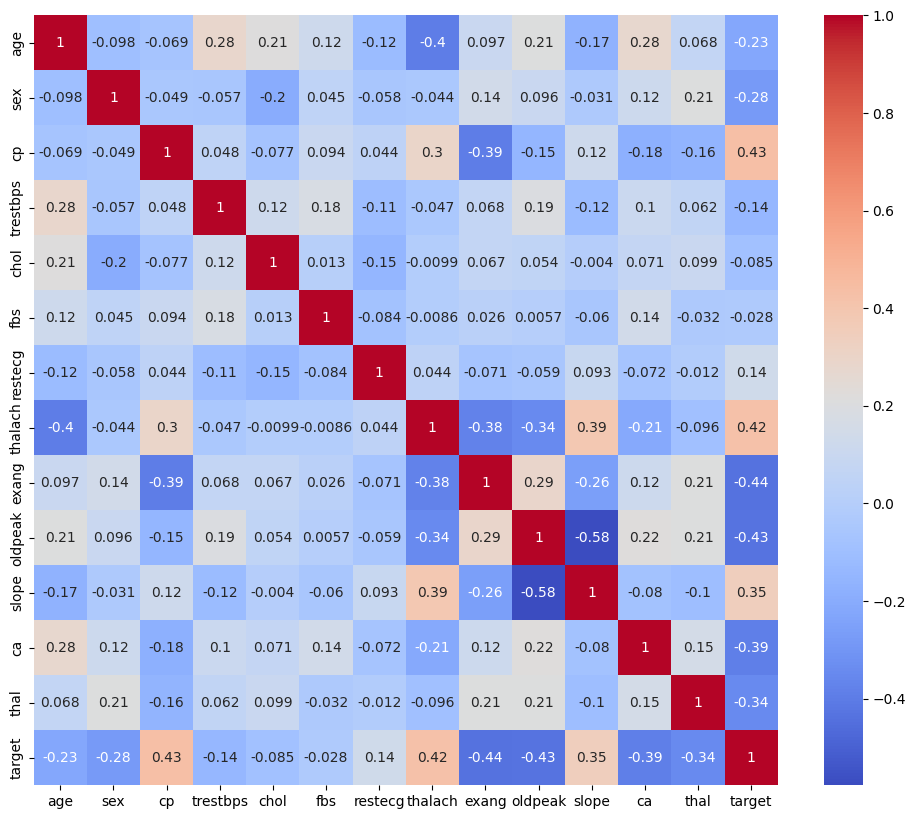

In [3]:
# build correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10), dpi=100)
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

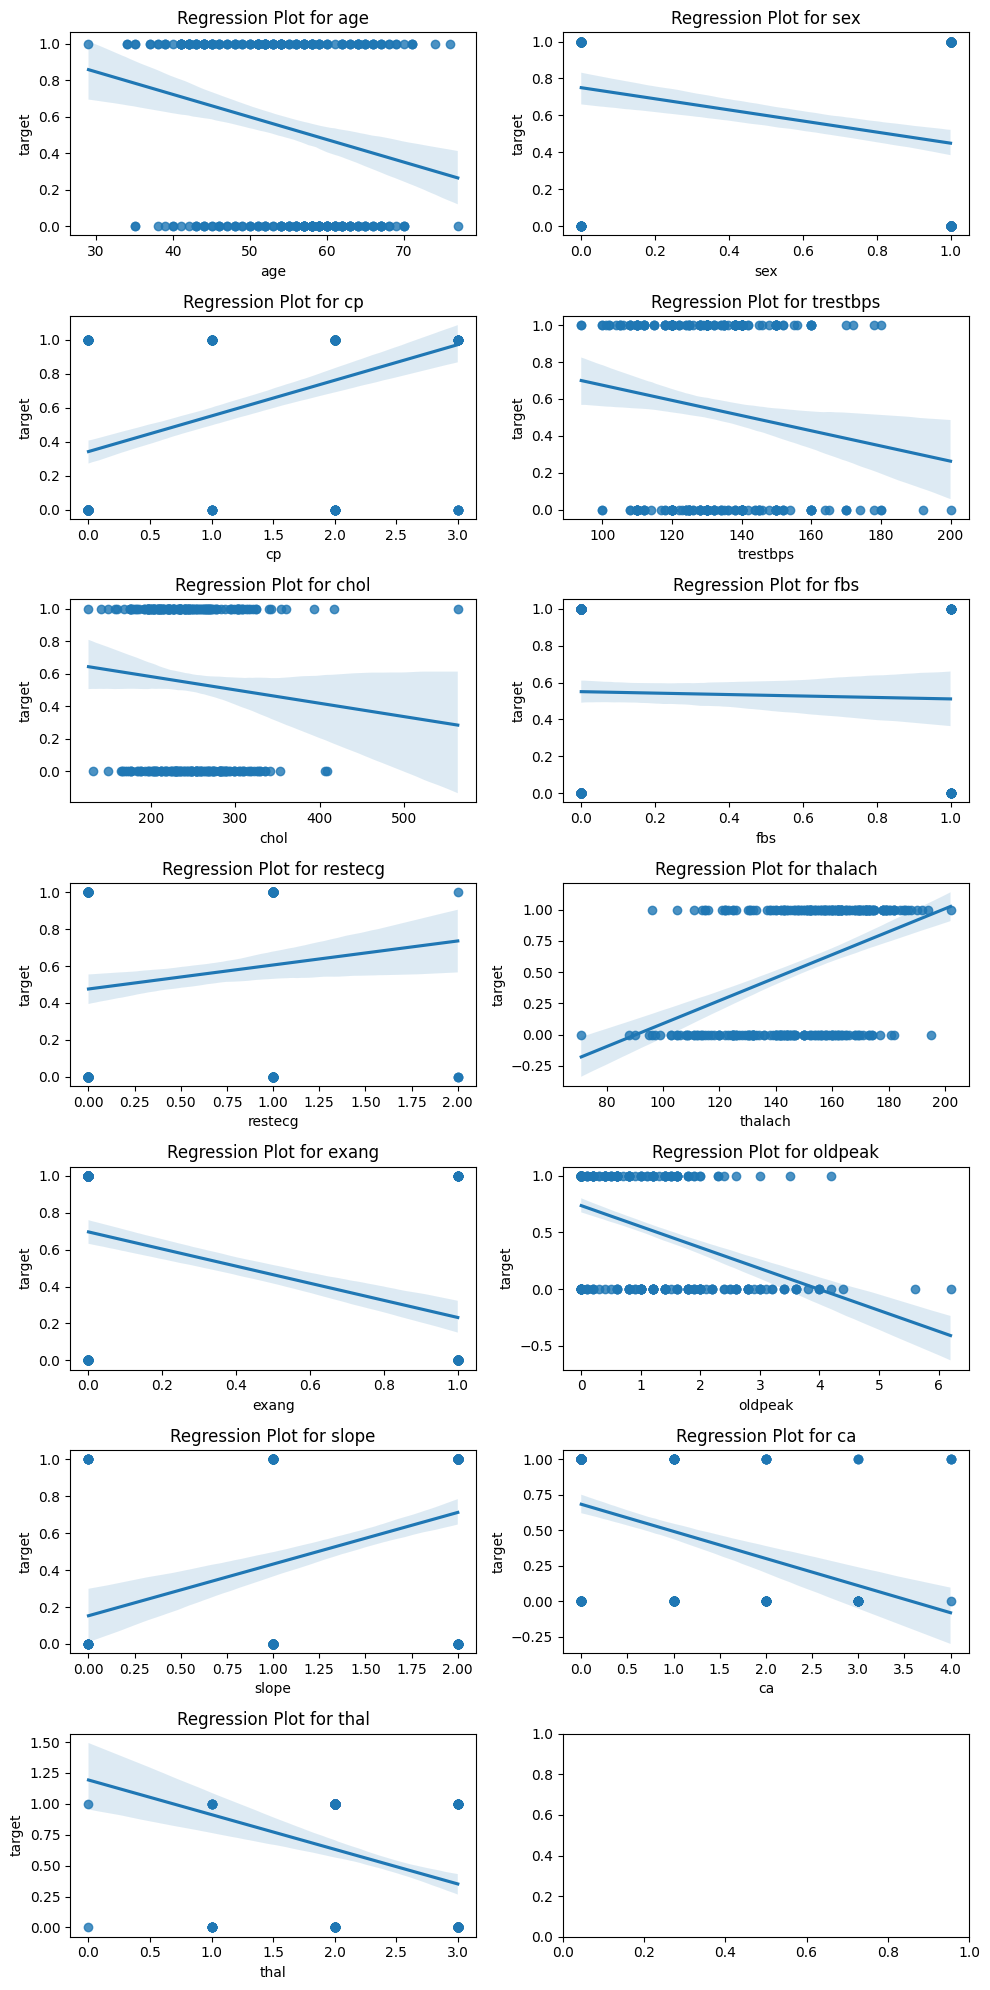

In [4]:
# Build regplots

data.columns
feature_names = list(data.drop('target', axis=1).columns)
len(feature_names)

num_rows = 7
num_cols = 2
num_plots = len(feature_names)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 20))
axes = axes.flatten()
for i in range(num_plots):
    if i < num_plots:
        sns.regplot(x=feature_names[i], y='target', data=data, ax=axes[i])
        axes[i].set_title(f'Regression Plot for {feature_names[i]}')
    else:
        fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

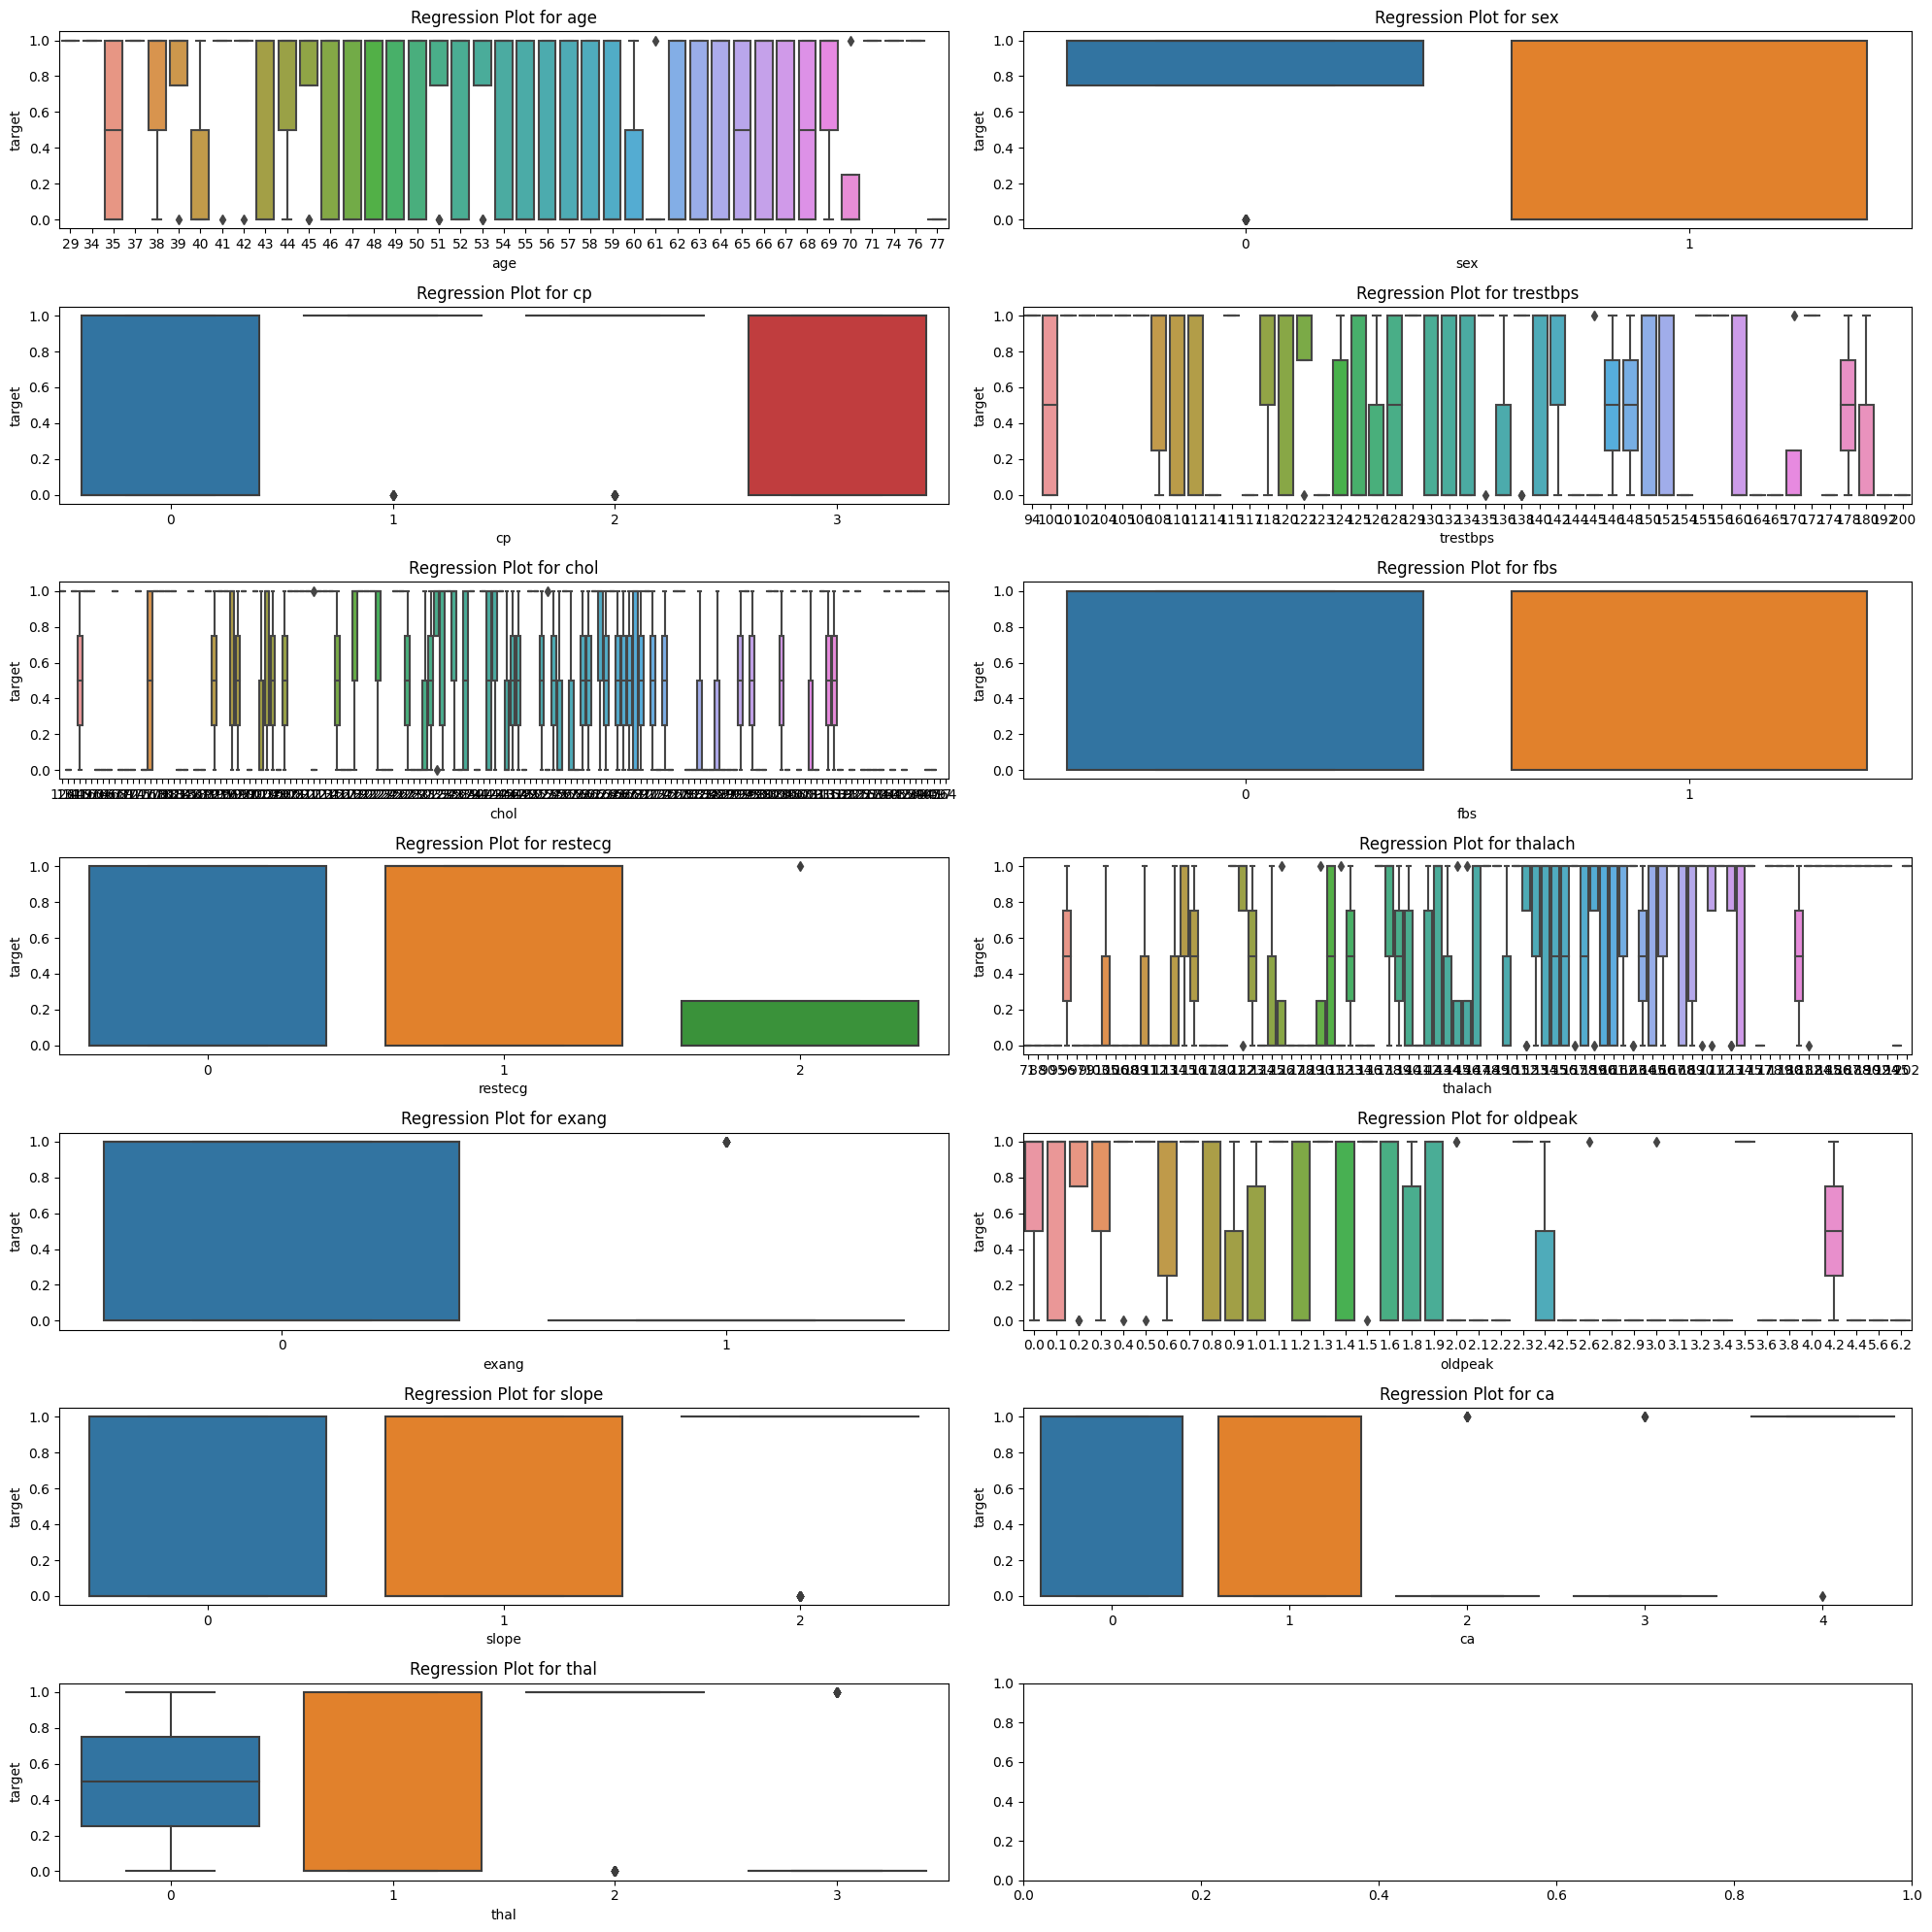

In [5]:
# Build boxplots

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))
axes = axes.flatten()
for i in range(num_plots):
    if i < num_plots:
        sns.boxplot(x=feature_names[i], y='target', data=data, ax=axes[i])
        axes[i].set_title(f'Regression Plot for {feature_names[i]}')
    else:
        fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

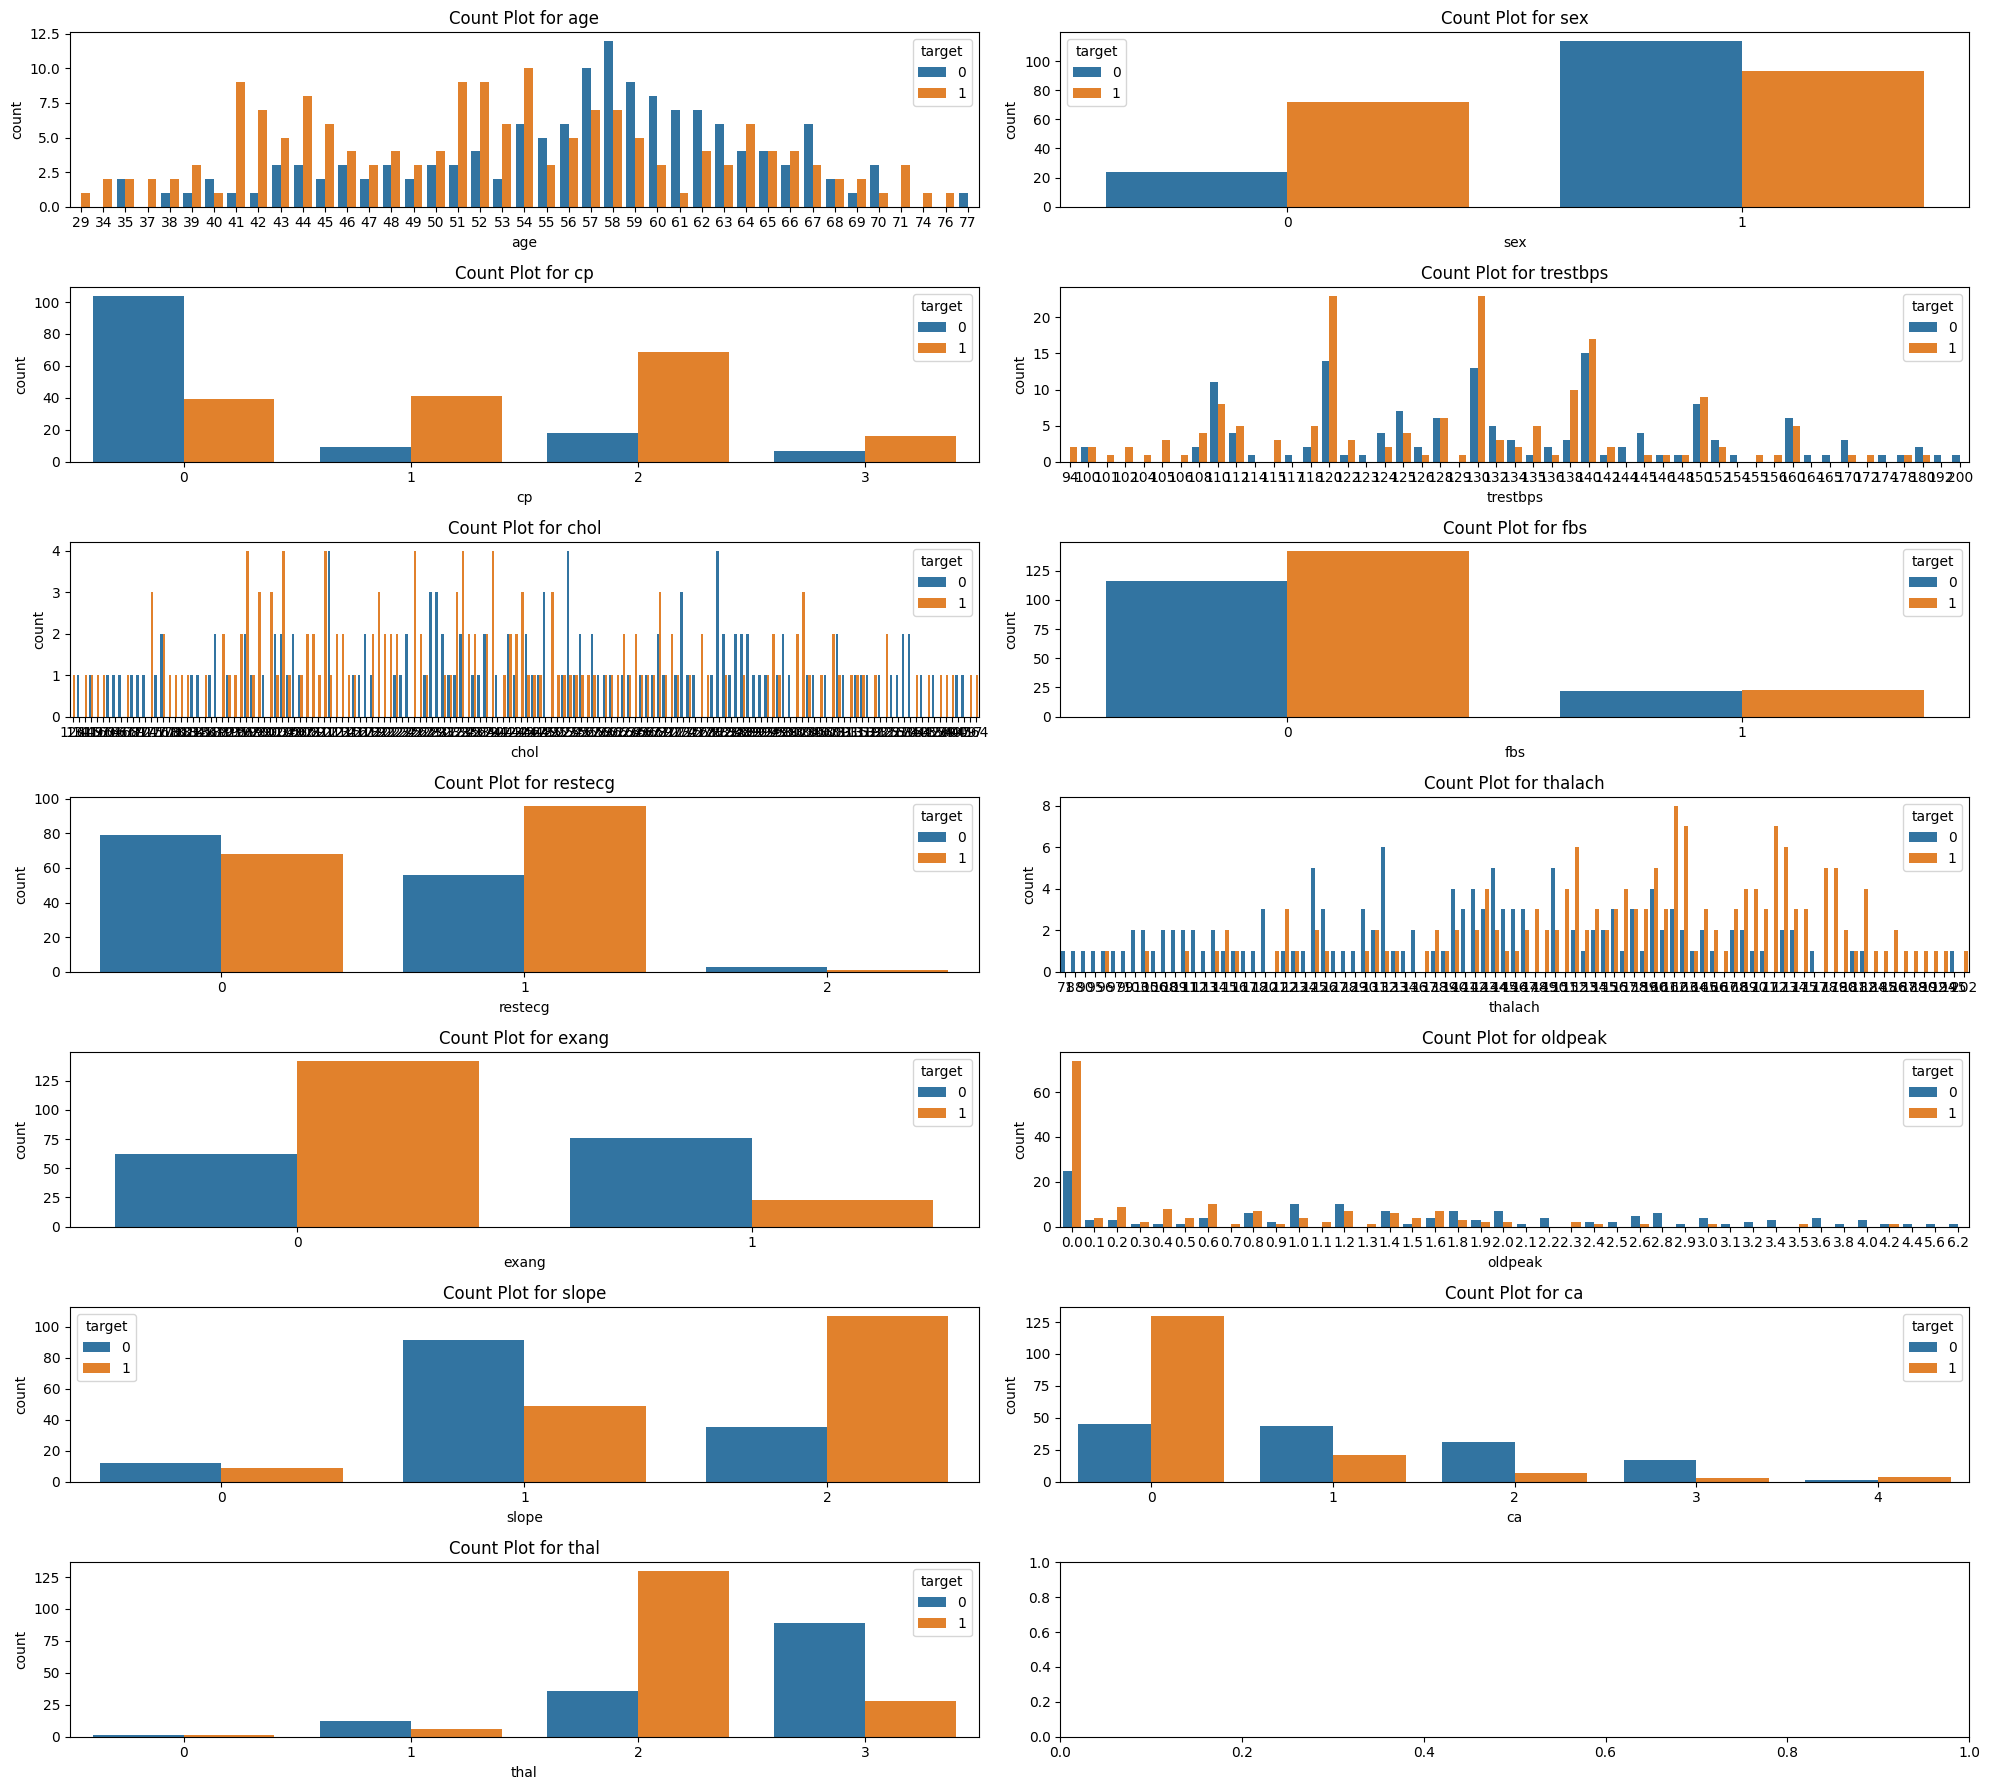

In [6]:
# Build bar plots

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 18))
axes = axes.flatten()
for i, feature in enumerate(feature_names):
    if i < len(feature_names):
        sns.countplot(x=feature, hue='target', data=data, ax=axes[i])
        axes[i].set_title(f'Count Plot for {feature}')
plt.tight_layout()
plt.show()

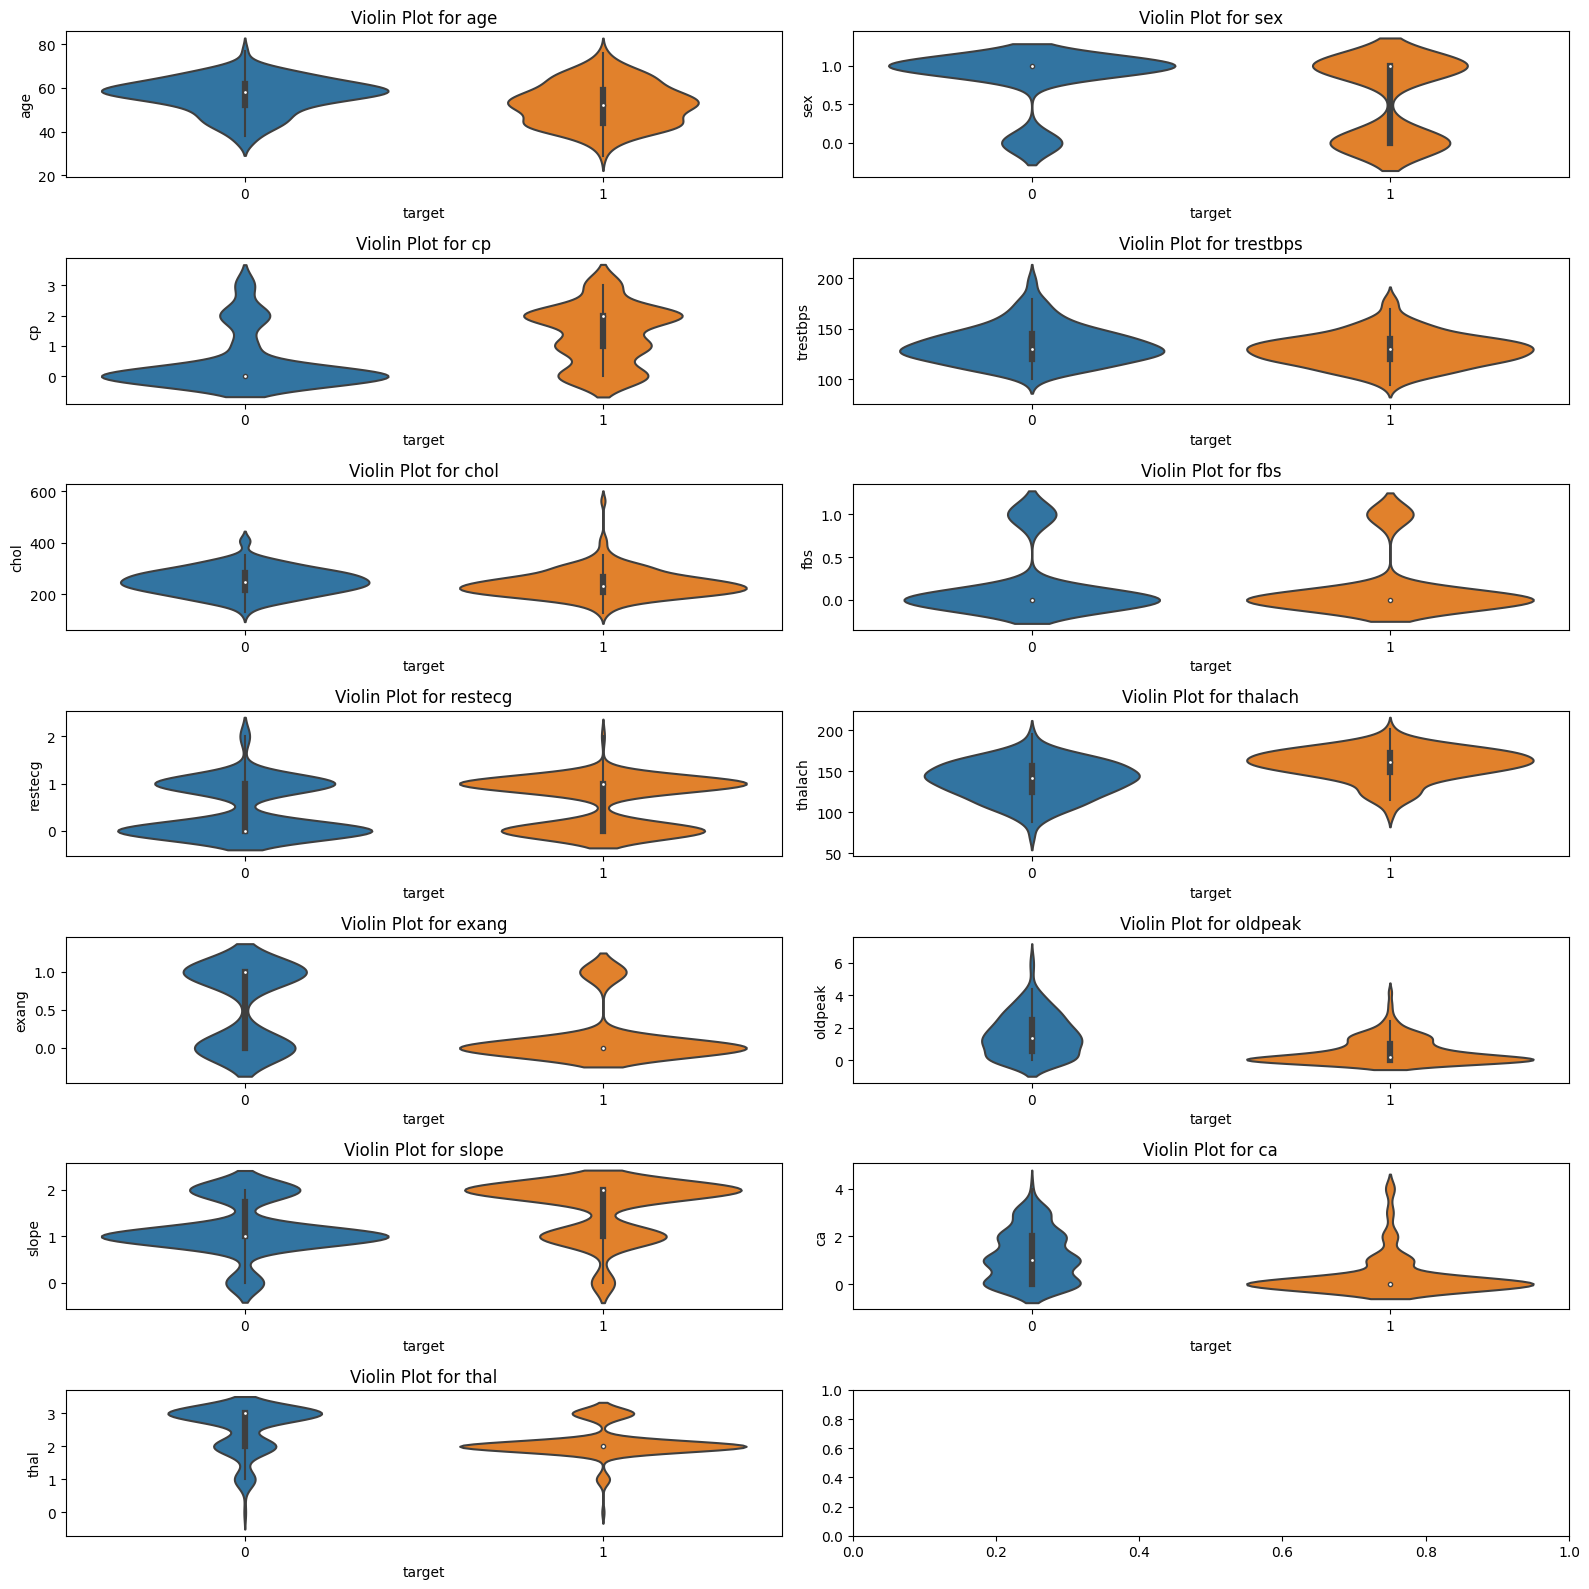

In [7]:
# Build violinplots

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 16))
axes = axes.flatten()
for i, feature in enumerate(feature_names):
    if i < len(feature_names):
        sns.violinplot(x='target', y=feature, data=data, ax=axes[i])
        axes[i].set_title(f'Violin Plot for {feature}')
plt.tight_layout()
plt.show()

**What percentage of the patients presented in the data have heart disease (`target' = 1`)?**

In [8]:
data['target'].value_counts()
d = 165
f = 138
h = (d / (d + f)) * 100
print(h)

54.45544554455446


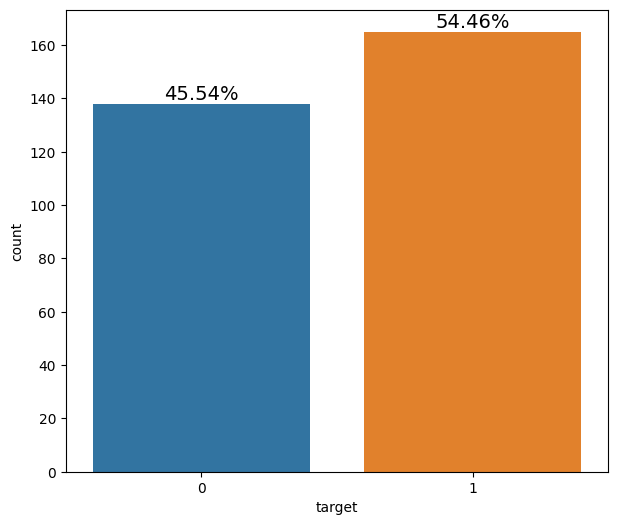

In [9]:
# Build countplot in percent

plt.figure(figsize=(7, 6), dpi=100)
total = float(len(data))
ax = sns.countplot(x='target', data=data)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height/total)*100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=14, color='black')
plt.show()

In [10]:
# Let's split the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'],
                                                    test_size=0.25, random_state=13)
X_train.shape, X_test.shape

((227, 13), (76, 13))

Let's train a linear classifier from `sklearn` with the maximum number of iterations `max_iter=1000`,
a constant value of the gradient descent step (`learning_rate='constant`) equal to 'eta0=0.1'.
As a seed, we will put `random_state=13'. Disable the regularization parameter: `alpha=0`.
The 'sklearn.linear_model.SGDClassifier' class combines different linear models - to get a logistic regression,
we fix the parameter `loss='log".

We need to find the value of the free coefficient of the resulting linear classifier

In [11]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='log_loss',  alpha=0,  max_iter=1000, learning_rate='constant',
                    eta0=0.1, random_state=13)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred.shape

(76,)

In [12]:
clf.coef_, clf.intercept_
d = list(clf.coef_)
print(d)

[array([-93.18252315, -18.25927929,  33.13144142, -65.99603819,
         1.75342142,   2.24072071,   6.44072071, 112.79675487,
       -16.1       , -33.35463964,  11.73144141, -38.3       ,
       -25.37783787])]


In [13]:
np.sqrt(np.sum(np.square(clf.coef_)))

175.67735435821564

Now let's find the value of the L2-norm of the vector of weights
(without taking into account the free coefficient) of the resulting linear classifier

In [14]:
def L2_norma(x):
  return np.sqrt(np.sum(np.square(x)))
L2 = L2_norma(clf.coef_)
print(L2)

175.67735435821564
